<a href="https://colab.research.google.com/github/sungjindo/ML_study/blob/main/HuggingFace_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install & Import

In [ ]:
!pip install transformers
!pip install --upgrade keras
!pip install --upgrade tensorflow
!pip install datasets
!pip install bertviz

# Introduction to HuggingFace

https://huggingface.co/transformers/index.html

**Contents**

1. Model & Tasks
2. Loading Pre-Trained Models
3. Fine-Tuning Models
4. Interpreting Your Model

# 1. Models & Tasks

### Models 

![autoregressive](https://miro.medium.com/max/1400/1*DGxLv3Z7WeSzVo8zCdJppw.png)

![autoencoding](https://miro.medium.com/max/1400/1*F7uLoK9el3XyK9p4_uSC6w.png)

https://medium.com/@zxiao2015/understanding-language-using-xlnet-with-autoregressive-pre-training-9c86e5bea443

   - **Autoregressive models:** Autoregressive models are pretrained on the classic language modeling task: guess the next token having read all the previous ones. They correspond to the *decoder* of the original transformer model, and a mask is used on top of the full sentence so that the attention heads can only see what was before in the text, and not what’s after. Although those models can be fine-tuned and achieve great results on many tasks, the most natural application is text generation. A typical example of such models is GPT.
   - **Autoencoding models:** Autoencoding models are pretrained by corrupting the input tokens in some way and trying to reconstruct the original sentence. They correspond to the encoder of the original transformer model in the sense that they get access to the full inputs without any mask. Those models usually build a bidirectional representation of the whole sentence. They can be fine-tuned and achieve great results on many tasks such as text generation, but their most natural application is sentence classification or token classification. A typical example of such models is BERT.
   - **Sequence-to-sequence models:** Sequence-to-sequence models use both the encoder and the decoder of the original transformer, either for translation tasks or by transforming other tasks to sequence-to-sequence problems. They can be fine-tuned to many tasks but their most natural applications are translation, summarization and question answering. The original transformer model is an example of such a model (only for translation), T5 is an example that can be fine-tuned on other tasks.
   - **Multimodal models:** Multimodal models mix text inputs with other kinds (e.g. images) and are more specific to a given task.
   - **Retrieval-based models:** Some models use documents retrieval during (pre)training and inference for open-domain question answering, for example

(https://huggingface.co/transformers/model_summary.html)


### Tasks 
   - **Sequence Classification:** classifying sequences according to a given number of classes. (ex. GLUE)
   - **Extractive Question Answering:** extracting an answer from a text given a question (ex. SQUAD)
   - **Language Modeling:** task of fitting a model to a corpus, which can be domain specific
       - **Masked Language Modeling:** task of masking tokens in a sequence with a masking token, and prompting the model to fill that mask with an appropriate token. (ex. BERT pre-training)
       - **Causal Language Modeling:** predicting the token following a sequence of tokens (ex. GPT-2)
   - **Text Generation:** create a coherent portion of text that is a continuation from the given context
   - **Named Entity Recognition (Token Classification):** classifying tokens according to a class, for example, identifying a token as a person, an organisation or a location
   - **Summarization:** task of summarizing a document or an article into a shorter text
   - **Translation:** task of translating a text from one language to another
   
(https://huggingface.co/transformers/task_summary.html)

## Pipeline

The pipelines are a great and easy way to use models for inference. These pipelines are objects that abstract most of the complex code from the library, offering a simple API dedicated to several tasks, including Named Entity Recognition, Masked Language Modeling, Sentiment Analysis, Feature Extraction and Question Answering. See the task summary for examples of use. (https://huggingface.co/transformers/main_classes/pipelines.html)

- ConversationalPipeline, FeatureExtractionPipeline, FillMaskPipeline, QuestionAnsweringPipeline, SummarizationPipeline, TextClassificationPipeline, TextGenerationPipeline, TokenClassificationPipeline, TranslationPipeline, ZeroShotClassificationPipeline, Text2TextGenerationPipeline, TableQuestionAnsweringPipeline

In [ ]:
from transformers import pipeline

### Sequence Classification

In [ ]:
# Sequence Classification
classifier = pipeline('sentiment-analysis')

In [ ]:
print(classifier("I love you")[0])
print(classifier("I hate you")[0])

{'label': 'POSITIVE', 'score': 0.9998656511306763}
{'label': 'NEGATIVE', 'score': 0.9991129040718079}


### Question Answering

In [ ]:
# Question Answering
qa = pipeline("question-answering")

In [ ]:
context = r"""
Extractive Question Answering is the task of extracting an answer from a text given a question. An example of a
question answering dataset is the SQuAD dataset, which is entirely based on that task. If you would like to fine-tune
a model on a SQuAD task, you may leverage the `run_squad.py`.
"""

In [ ]:
print(qa(question="What is extractive question answering?", context=context))
print(qa(question="What is a good example of a question answering dataset?", context=context))

{'score': 0.6222440004348755, 'start': 34, 'end': 95, 'answer': 'the task of extracting an answer from a text given a question'}
{'score': 0.5115318894386292, 'start': 147, 'end': 160, 'answer': 'SQuAD dataset'}


### Text Generation

In [ ]:
text_generator = pipeline("text-generation")

Some weights of GPT2Model were not initialized from the model checkpoint at gpt2 and are newly initialized: ['h.0.attn.masked_bias', 'h.1.attn.masked_bias', 'h.2.attn.masked_bias', 'h.3.attn.masked_bias', 'h.4.attn.masked_bias', 'h.5.attn.masked_bias', 'h.6.attn.masked_bias', 'h.7.attn.masked_bias', 'h.8.attn.masked_bias', 'h.9.attn.masked_bias', 'h.10.attn.masked_bias', 'h.11.attn.masked_bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
print(text_generator("When the Titanic crashed, I", max_length=50, do_sample=False))

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "When the Titanic crashed, I was in the middle of a long day, and I was thinking, 'What if I'm going to die?' And I was thinking, 'What if I'm going to die?' And I was thinking, 'What"}]


Try Language Modeling, Token Classification and more on your own...

# 2. Loading Pre-Trained Models

We strongly limited the number of user-facing abstractions to learn, in fact, there are almost no abstractions, just three standard classes required to use each model: 
1. configuration, 
2. models and 
3. tokenizer.

In [ ]:
from transformers import AutoConfig, AutoTokenizer, AutoModel, AutoModelForSequenceClassification

### Configuration

The base class PretrainedConfig implements the common methods for loading/saving a configuration either from a local file or directory, or from a pretrained model configuration provided by the library (downloaded from HuggingFace’s AWS S3 repository).

`classmethod: .from_pretrained(pretrained_model_name_or_path, **kwargs)`

In [ ]:
# Set Keyword Args 
config_args = {'hidden_dropout_prob':0.2, 
              'num_labels':2}

# Or.. load from path
# config_path = './model/checkpoint.ckpt.index'

In [ ]:
model_name = 'xlm-roberta-base'
config = AutoConfig.from_pretrained(model_name, **config_args)

In [ ]:
config

XLMRobertaConfig {
  "architectures": [
    "XLMRobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "eos_token_id": 2,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.2,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "xlm-roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "output_past": true,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "transformers_version": "4.3.2",
  "type_vocab_size": 1,
  "use_cache": true,
  "vocab_size": 250002
}

### Models

The base classes PreTrainedModel, TFPreTrainedModel, and FlaxPreTrainedModel implement the common methods for loading/saving a model either from a local file or directory, or from a pretrained model configuration provided by the library (downloaded from HuggingFace’s AWS S3 repository).

Automodel is a generic model class that will be instantiated as one of the base model classes of the library. For specific tasks, load AutoModelForTASK.

In [ ]:
model_config = AutoModel.from_config(config)
model_pretrained = AutoModel.from_pretrained(model_name)

In [ ]:
# Notice Dropout(p=0.2)
model_config

XLMRobertaModel(
  (embeddings): RobertaEmbeddings(
    (word_embeddings): Embedding(250002, 768, padding_idx=1)
    (position_embeddings): Embedding(514, 768, padding_idx=1)
    (token_type_embeddings): Embedding(1, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (dropout): Dropout(p=0.2, inplace=False)
  )
  (encoder): RobertaEncoder(
    (layer): ModuleList(
      (0): RobertaLayer(
        (attention): RobertaAttention(
          (self): RobertaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): RobertaSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
            (dropout): 

In [ ]:
# Notice Dropout(p=0.1)
model_pretrained

XLMRobertaModel(
  (embeddings): RobertaEmbeddings(
    (word_embeddings): Embedding(250002, 768, padding_idx=1)
    (position_embeddings): Embedding(514, 768, padding_idx=1)
    (token_type_embeddings): Embedding(1, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): RobertaEncoder(
    (layer): ModuleList(
      (0): RobertaLayer(
        (attention): RobertaAttention(
          (self): RobertaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): RobertaSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
            (dropout): 

In [ ]:
config = AutoConfig.from_pretrained(model_name, **config_args)
model_seq = AutoModelForSequenceClassification.from_pretrained(model_name, config=config)

Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForSequenceClassification: ['lm_head.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight', 'roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense

In [ ]:
# Instead of Pooling Layer, Classification Layer added on model
model_seq

XLMRobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(250002, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.2, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0): RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (La

### Tokenizer

A tokenizer is in charge of preparing the inputs for a model. The library contains tokenizers for all the models. Most of the tokenizers are available in two flavors: a full python implementation and a “Fast” implementation based on the Rust library tokenizers. The “Fast” implementations allows:

1. a significant speed-up in particular when doing batched tokenization and

2. additional methods to map between the original string (character and words) and the token space (e.g. getting the index of the token comprising a given character or the span of characters corresponding to a given token). Currently no “Fast” implementation is available for the SentencePiece-based tokenizers (for T5, ALBERT, CamemBERT, XLMRoBERTa and XLNet models).

`classmethod: from_pretrained(pretrained_model_name_or_path, *inputs, **kwargs)`

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(pretrained_model_name_or_path=model_name, config=config)

In [ ]:
tokenizer

PreTrainedTokenizerFast(name_or_path='xlm-roberta-base', vocab_size=250002, model_max_len=512, is_fast=True, padding_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>', 'sep_token': '</s>', 'pad_token': '<pad>', 'cls_token': '<s>', 'mask_token': AddedToken("<mask>", rstrip=False, lstrip=True, single_word=False, normalized=False)})

In [ ]:
print(tokenizer.tokenize('그 영화는 재밌었다'))
print(tokenizer('그 영화는 재밌었다'))
print(tokenizer(['그 영화는 재밌었다','나는 별로였다']))

['▁그', '▁영화', '는', '▁재', '밌', '었다']
{'input_ids': [0, 2625, 29549, 769, 11105, 249902, 23548, 2], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1]}
{'input_ids': [[0, 2625, 29549, 769, 11105, 249902, 23548, 2], [0, 37231, 6, 109777, 43680, 2]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1]]}


### Using Fine-Tuned models in Pipeline

https://huggingface.co/nlptown/bert-base-multilingual-uncased-sentiment

#### Sentiment Classification (EN)

In [ ]:
# Use task specific fine-tuned model in Pipeline
# fine-tuned model that predicts the sentiment of the review as a number of stars (between 1 and 5).
model_name = "nlptown/bert-base-multilingual-uncased-sentiment" 

model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

pipe = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)

In [ ]:
print(pipe("Je t'adore")) # I love you
print(pipe("Je te deteste")) # I hate you

# 3. Fine-Tuning Models

![Screen%20Shot%202021-03-21%20at%207.24.28%20PM.png](attachment:Screen%20Shot%202021-03-21%20at%207.24.28%20PM.png)

https://huggingface.co/transformers/examples.html

## Fine Tuning Example: NSMC

Naver Sentiment Movie Classification
https://huggingface.co/datasets/nsmc

In [ ]:
from transformers import AutoConfig, AutoTokenizer, AutoModelForSequenceClassification

model_path_or_name = 'xlm-roberta-base'
config = AutoConfig.from_pretrained(model_path_or_name, num_labels=2)
model = AutoModelForSequenceClassification.from_pretrained(model_path_or_name)
tokenizer = AutoTokenizer.from_pretrained(model_path_or_name, config=config)

Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForSequenceClassification: ['lm_head.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight', 'roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense

### Load Custom Dataset

The datasets.Dataset object behaves like a normal python container. You can query its length, get rows, columns and also lot of metadata on the dataset (description, citation, split sizes, etc).

https://huggingface.co/docs/datasets/exploring.html

### 1. Using Datasets 

https://huggingface.co/datasets/nsmc

In [ ]:
!pip3 install -U --user datasets

In [ ]:
from datasets import load_dataset

In [ ]:
dataset = load_dataset('nsmc')

Using custom data configuration default


Dataset nsmc downloaded and prepared to /home/hpshin/.cache/huggingface/datasets/nsmc/default/1.1.0/bfd4729bf1a67114e5267e6916b9e4807010aeb238e4a3c2b95fbfa3a014b5f3. Subsequent calls will reuse this data.


In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['document', 'id', 'label'],
        num_rows: 150000
    })
    test: Dataset({
        features: ['document', 'id', 'label'],
        num_rows: 50000
    })
})

In [ ]:
dataset['train'][0]

{'document': '아 더빙.. 진짜 짜증나네요 목소리', 'id': '9976970', 'label': 0}

In [ ]:
dataset['test'][0]

{'document': '굳 ㅋ', 'id': '6270596', 'label': 1}

In [ ]:
import torch
class nsmc_data(torch.utils.data.Dataset):
    def __init__(self, dataset, tokenizer):
        super().__init__()
        self.label = torch.tensor(dataset['label']).long()
        features = tokenizer([str(x) for x in dataset['document']], padding=True, truncation=True)
        self.input = torch.tensor(features['input_ids'])
        self.mask = torch.tensor(features['attention_mask'])
    
    def __len__(self):
        return len(self.input)

    def __getitem__(self, index):
        return {'input_ids': self.input[index], 'attention_mask': self.mask[index], 'label':self.label[index]}

In [ ]:
train_data = nsmc_data(dataset['train'], tokenizer)

In [ ]:
test_data = nsmc_data(dataset['test'], tokenizer)

### 2. Calling from file

In [ ]:
import pandas as pd
import torch
train_file_path = '/home/jovyan/NSMC/ratings_train.txt'
test_file_path = '/home/jovyan/NSMC/ratings_test.txt'

In [ ]:
class nsmc_data(torch.utils.data.Dataset):
    def __init__(self, dataset, tokenzier):
        super().__init__()
        self.label = torch.tensor(dataset['label']).long()
        features = tokenizer([str(x) for x in dataset.document], padding=True, truncation=True)
        self.input = torch.tensor(features['input_ids'])
        self.mask = torch.tensor(features['attention_mask'])
    
    def __len__(self):
        return len(self.input)

    def __getitem__(self, index):
        return {'input_ids': self.input[index], 'attention_mask': self.mask[index], 'label':self.label[index]}

In [ ]:
train_data = nsmc_data(pd.read_csv(train_file_path, sep='\t', quoting=3), tokenizer)
test_data = nsmc_data(pd.read_csv(test_file_path, sep='\t', quoting=3), tokenizer)

In [ ]:
print(len(train_data))
print(len(test_data))

### Load Trainer 

The **Trainer** and **TFTrainer** classes provide an API for feature-complete training in most standard use cases. It’s used in most of the example scripts.

Before instantiating your Trainer/TFTrainer, create a TrainingArguments/TFTrainingArguments to access all the points of customization during training.

In [ ]:
from transformers import TrainingArguments, Trainer
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

In [ ]:
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='binary')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

In [ ]:
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=1, 
    per_device_train_batch_size=32,
    per_device_eval_batch_size=64,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
)

In [ ]:
training_args

TrainingArguments(output_dir=./results, overwrite_output_dir=False, do_train=False, do_eval=None, do_predict=False, evaluation_strategy=EvaluationStrategy.NO, prediction_loss_only=False, per_device_train_batch_size=32, per_device_eval_batch_size=64, gradient_accumulation_steps=1, eval_accumulation_steps=None, learning_rate=5e-05, weight_decay=0.01, adam_beta1=0.9, adam_beta2=0.999, adam_epsilon=1e-08, max_grad_norm=1.0, num_train_epochs=1, max_steps=-1, lr_scheduler_type=SchedulerType.LINEAR, warmup_steps=500, logging_dir=./logs, logging_first_step=False, logging_steps=500, save_steps=500, save_total_limit=None, no_cuda=False, seed=42, fp16=False, fp16_opt_level=O1, fp16_backend=auto, local_rank=-1, tpu_num_cores=None, tpu_metrics_debug=False, debug=False, dataloader_drop_last=False, eval_steps=500, dataloader_num_workers=0, past_index=-1, run_name=./results, disable_tqdm=False, remove_unused_columns=True, label_names=None, load_best_model_at_end=False, metric_for_best_model=None, grea

In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    compute_metrics=compute_metrics,
    train_dataset=train_data,
    eval_dataset=test_data
)

In [ ]:
trainer.train()

/home/hpshin/.local/lib/python3.6/site-packages/torch/nn/parallel/data_parallel.py:30: UserWarning: 
    There is an imbalance between your GPUs. You may want to exclude GPU 2 which
    has less than 75% of the memory or cores of GPU 0. You can do so by setting
    the device_ids argument to DataParallel, or by setting the CUDA_VISIBLE_DEVICES
    environment variable.
  warnings.warn(imbalance_warn.format(device_ids[min_pos], device_ids[max_pos]))
/home/hpshin/.local/lib/python3.6/site-packages/torch/nn/parallel/_functions.py:64: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Step,Training Loss
500,0.450800
1000,0.309900


/home/hpshin/.local/lib/python3.6/site-packages/torch/nn/parallel/_functions.py:64: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/home/hpshin/.local/lib/python3.6/site-packages/torch/nn/parallel/_functions.py:64: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


TrainOutput(global_step=1172, training_loss=0.3660018126712317, metrics={'train_runtime': 2130.3019, 'train_samples_per_second': 0.55, 'total_flos': 35534174770800000, 'epoch': 1.0})

In [ ]:
trainer.evaluate()

/home/hpshin/.local/lib/python3.6/site-packages/torch/nn/parallel/data_parallel.py:30: UserWarning: 
    There is an imbalance between your GPUs. You may want to exclude GPU 2 which
    has less than 75% of the memory or cores of GPU 0. You can do so by setting
    the device_ids argument to DataParallel, or by setting the CUDA_VISIBLE_DEVICES
    environment variable.
  warnings.warn(imbalance_warn.format(device_ids[min_pos], device_ids[max_pos]))


{'eval_loss': 0.26503536105155945,
 'eval_accuracy': 0.88908,
 'eval_f1': 0.8906976744186047,
 'eval_precision': 0.8838346305784801,
 'eval_recall': 0.8976681364954515,
 'eval_runtime': 68.9754,
 'eval_samples_per_second': 724.896,
 'epoch': 1.0}

In [ ]:
model.save_pretrained('./nsmc_model')
tokenizer.save_pretrained('./nsmc_tokenzier')

('./nsmc_tokenzier/tokenizer_config.json',
 './nsmc_tokenzier/special_tokens_map.json',
 './nsmc_tokenzier/sentencepiece.bpe.model',
 './nsmc_tokenzier/added_tokens.json')

# 4. Interpreting Your Model

### Looking at Attention

In [ ]:
from bertviz import head_view

In [ ]:
model_path_or_name = './nsmc_model'
model = AutoModelForSequenceClassification.from_pretrained(model_path_or_name, output_attentions=True)

In [ ]:
sentence = "이 영화는 아주 재미있다."
inputs = tokenizer.encode_plus(sentence, return_tensors='pt', add_special_tokens=True)

In [ ]:
input_ids = inputs['input_ids'].to(model.device)
attention = model(input_ids)[-1]

In [ ]:
input_id_list = input_ids[0].tolist() # Batch index 0
tokens = tokenizer.convert_ids_to_tokens(input_id_list)

In [ ]:
input_id_list

[0, 1504, 29549, 769, 65544, 157403, 1875, 5, 2]

In [ ]:
tokens

['<s>', '▁이', '▁영화', '는', '▁아주', '▁재미있', '다', '.', '</s>']

In [ ]:
head_view(attention, tokens)

<IPython.core.display.Javascript object>

### Error Analysis

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import numpy as np
import pandas as pd

In [ ]:
#Get Predictions as Array
preds = trainer.predict(test_data)

/home/hpshin/.local/lib/python3.6/site-packages/torch/nn/parallel/data_parallel.py:30: UserWarning: 
    There is an imbalance between your GPUs. You may want to exclude GPU 2 which
    has less than 75% of the memory or cores of GPU 0. You can do so by setting
    the device_ids argument to DataParallel, or by setting the CUDA_VISIBLE_DEVICES
    environment variable.
  warnings.warn(imbalance_warn.format(device_ids[min_pos], device_ids[max_pos]))
/home/hpshin/.local/lib/python3.6/site-packages/torch/nn/parallel/_functions.py:64: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


In [ ]:
#Argmax Softmax Values
predictions = np.argmax(preds[0], axis=1)
labels = preds[1]
print(predictions)
print(labels)

[1 1 0 ... 1 0 0]
[1 0 0 ... 0 0 0]


[Text(33,0.5,'Observed'),
 Text(0.5,15,'Predicted'),
 Text(0.5,1,'Confusion Matrix')]

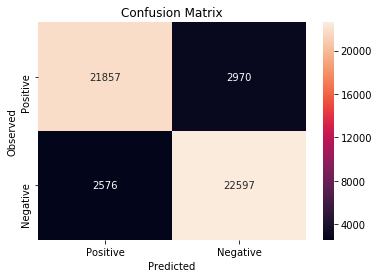

In [ ]:
#Confusion Matrix

cm = confusion_matrix(labels,predictions)
df_cm = pd.DataFrame(cm, index = ["Positive", "Negative"],
                  columns = ["Positive", "Negative"])
sn.heatmap(df_cm, annot=True, fmt=".0f").set(title="Confusion Matrix", xlabel="Predicted", ylabel="Observed",)

In [ ]:
(labels == 1)&(predictions == 0)

array([False, False, False, ..., False, False, False])

In [ ]:
test_dataset = pd.read_csv(test_file_path, sep='\t', quoting=3)

NameError: name 'test_file_path' is not defined

In [ ]:
# False Negative
test_dataset['document'][(labels == 1)&(predictions == 0)].sample(10)

In [ ]:
# False Positive
test_dataset['document'][(labels == 0)&(predictions == 1)].sample(10)